### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import eda_helper_functions

In [3]:
file_path=r"C:\Users\LENOVO\OneDrive\Desktop\Flight_price_predict_project\DataSets\train_dataset.csv"

In [4]:
train_data=pd.read_csv(file_path)

In [5]:
train_data.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087


In [6]:
train_data.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [7]:
train_data=train_data.assign(**{
    col: pd.to_datetime(train_data.loc[:,col], dayfirst=True, format="mixed")
    for col in ["date_of_journey","dep_time","arrival_time"]
})
train_data.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-07-19 08:55:00,2024-07-19 19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-19 17:30:00,2024-07-19 04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,2024-07-19 11:40:00,2024-07-19 14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,2024-07-19 09:25:00,2024-07-19 18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-07-19 22:55:00,2024-07-19 07:40:00,525,1.0,In-flight meal not included,11087


In [8]:
train_data.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [10]:
train_data.describe(include="number")

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [11]:
(
    train_data
    .assign(total_stops=train_data["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6694.0,6695
unique,12,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2386,2730,2730,3580.0,5249


In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
train_data["total_stops"]=train_data["total_stops"].fillna(0)

### Analysis of Outliers

In [14]:
forest=IsolationForest(n_estimators=10, random_state=42)

In [15]:
(
    train_data
    .assign(outlier=forest.fit_predict(train_data
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier==-1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2024-07-19 18:55:00,2024-07-19 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-07-19 05:45:00,2024-07-19 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-07-19 23:05:00,2024-07-19 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,2024-07-19 14:05:00,2024-07-19 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2024-07-19 21:25:00,2024-07-19 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...
6687,Air India,2019-06-06,Kolkata,Banglore,2024-07-19 05:50:00,2024-07-19 08:55:00,1625,2.0,No Info,12723,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-07-19 21:25:00,2024-07-19 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-07-19 09:10:00,2024-07-19 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-19 10:45:00,2024-07-19 18:50:00,1925,2.0,No Info,11093,-1


In [16]:
train_data.isnull().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
price              0
dtype: int64

### 6. Correlation Analysis

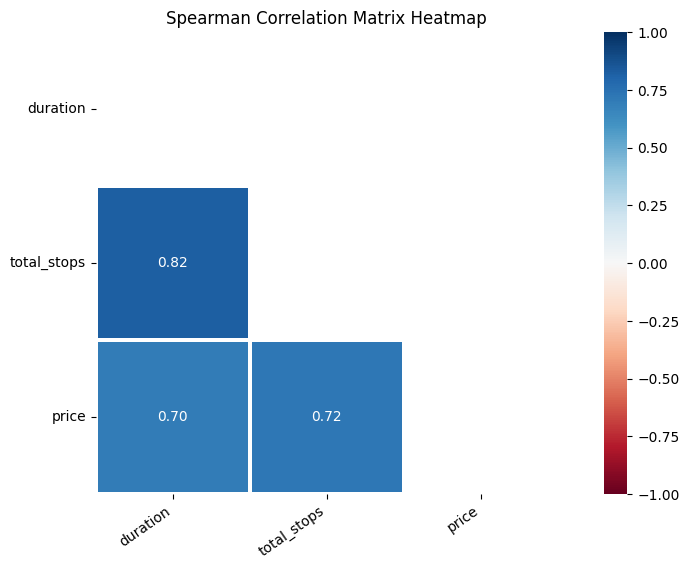

In [17]:
eda_helper_functions.correlation_heatmap(train_data)

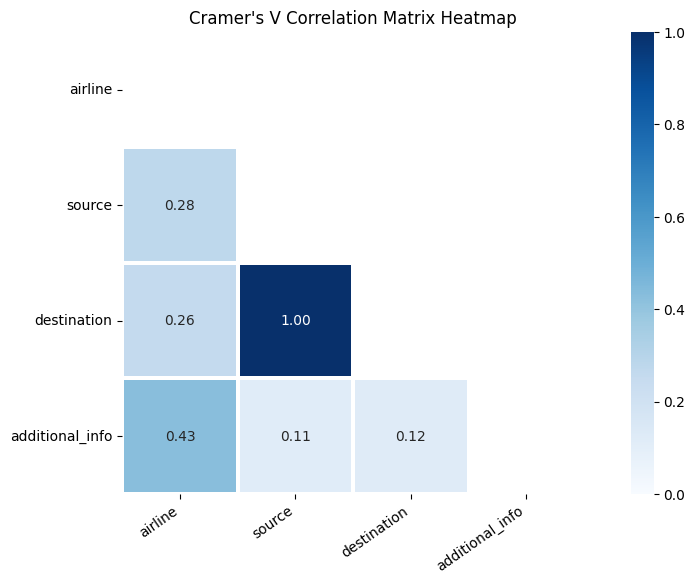

In [18]:
eda_helper_functions.cramersV_heatmap(train_data)

### 8. Detailed Analysis

In [19]:
train_data.airline.unique()

array(['Jet Airways', 'Goair', 'Air India', 'Spicejet',
       'Multiple Carriers', 'Indigo', 'Vistara', 'Air Asia', 'Vistara ',
       'Multiple Carriers ', 'Jet Airways ', 'Trujet'], dtype=object)

In [20]:
eda_helper_functions.cat_summary(train_data, "airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 12 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,12
top,Jet Airways
freq,2386


,count,percentage
category,,
Jet Airways,2386,0.356385
Indigo,1296,0.193577
Air India,1076,0.160717
Multiple Carriers,730,0.109037
Spicejet,537,0.080209
Vistara,319,0.047647
Air Asia,211,0.031516
Goair,125,0.018671
Multiple Carriers,6,0.000896


In [21]:
#Modifying airline column which contains some duplicates
train_data["airline"]=train_data["airline"].str.strip()

In [22]:
train_data.airline.unique()

array(['Jet Airways', 'Goair', 'Air India', 'Spicejet',
       'Multiple Carriers', 'Indigo', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [23]:
train_data.duplicated().sum()

np.int64(0)

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6695 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [25]:
eda_helper_functions.cat_summary(train_data, "airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,9
top,Jet Airways
freq,2391


,count,percentage
category,,
Jet Airways,2391,0.357132
Indigo,1296,0.193577
Air India,1076,0.160717
Multiple Carriers,736,0.109933
Spicejet,537,0.080209
Vistara,322,0.048096
Air Asia,211,0.031516
Goair,125,0.018671
Trujet,1,0.000149


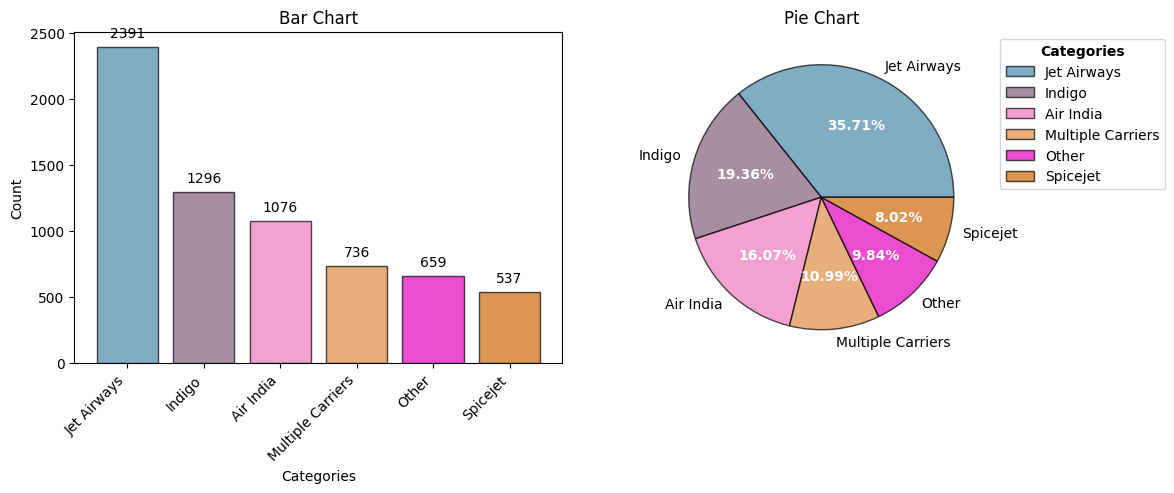

In [26]:
eda_helper_functions.cat_univar_plots(train_data,"airline", show_wordcloud=False, k=5)

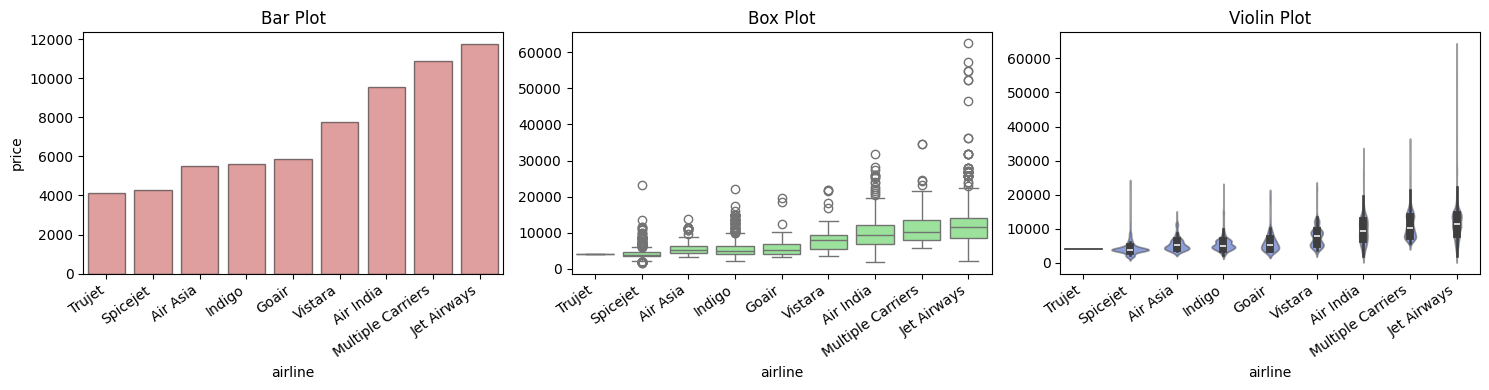

In [27]:
eda_helper_functions.num_cat_bivar_plots(train_data,"price","airline")

In [28]:
eda_helper_functions.num_cat_hyp_testing(train_data, "price", "destination")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 444.81438403541205
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2144.685992140532
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


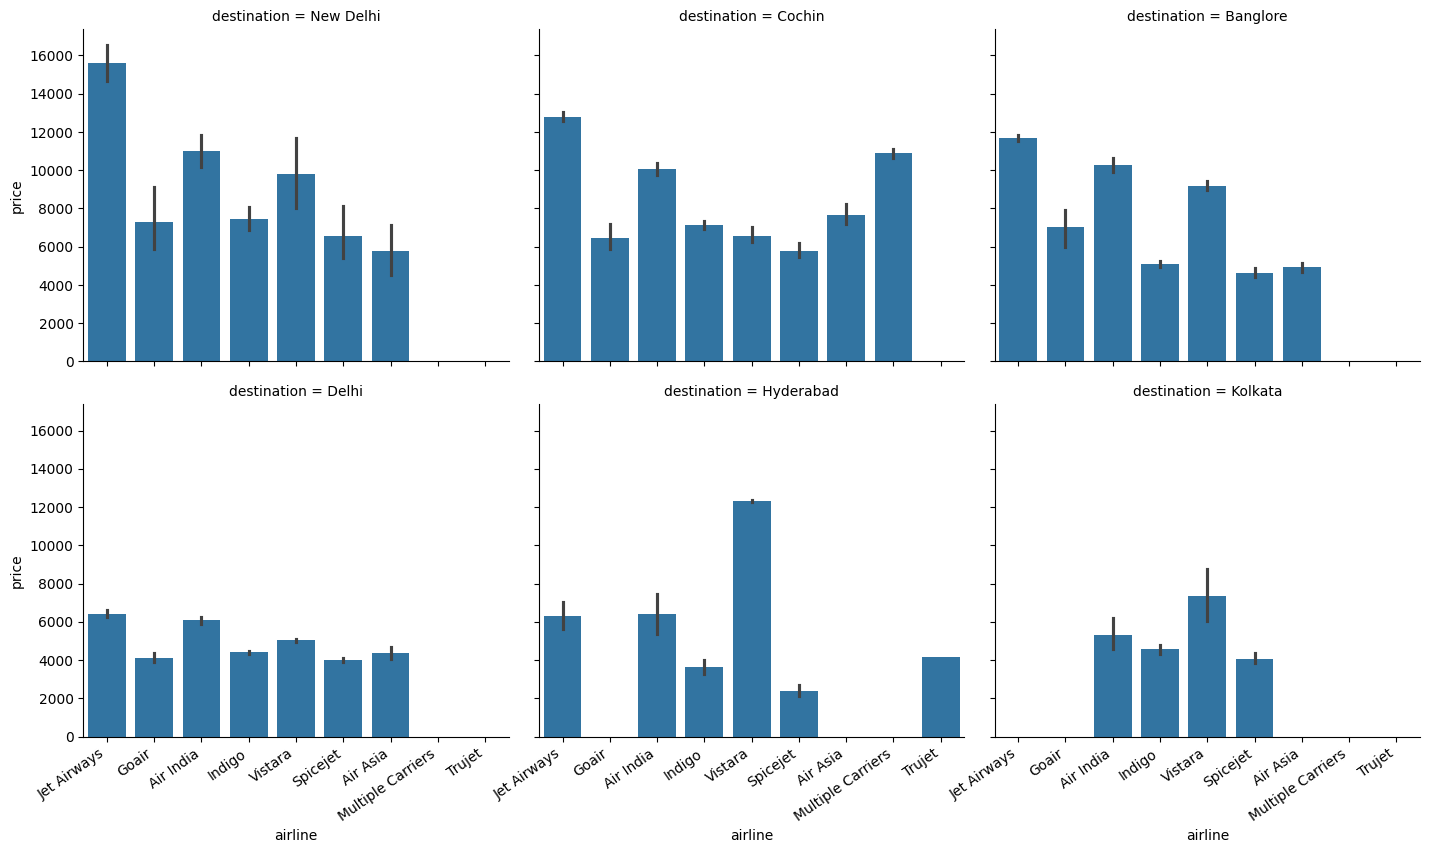

In [29]:
airline_grid=sns.FacetGrid(
    data=train_data,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    # sharex=True,
    sharey=True
)


airline_grid.map(sns.barplot,"airline", "price")

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

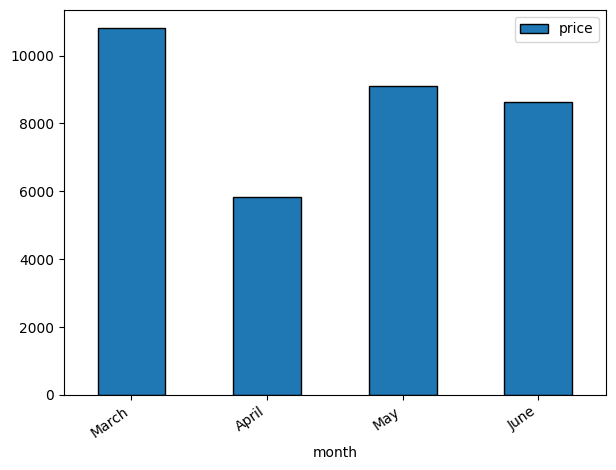

In [30]:
(
    train_data
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(7,5),
        edgecolor="black"
    )

)
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

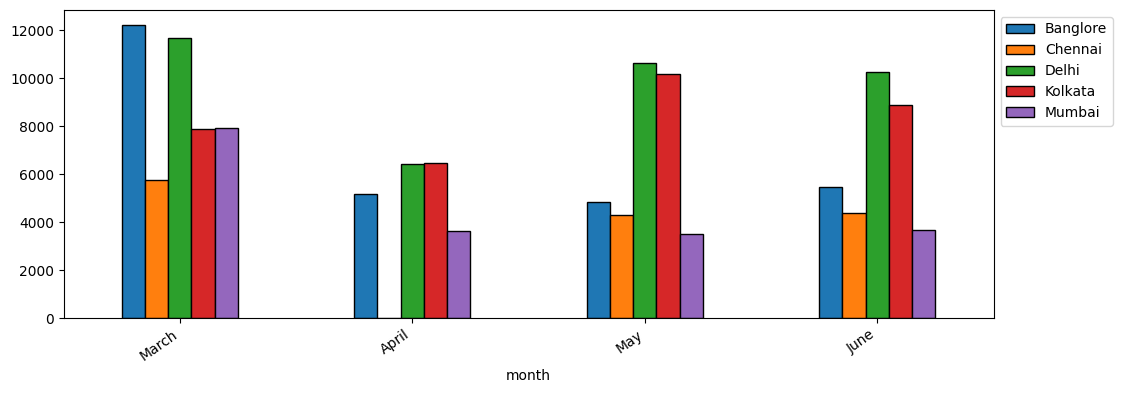

In [31]:
(
    train_data
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12,4),
        edgecolor="black"
    )
)
ax=plt.gca()
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1,1)
)
eda_helper_functions.rotate_xlabels(ax)

In [32]:
(
    train_data
    .dep_time
    .dt.hour
    .pipe(lambda ser: pd.Series(np.select([ser.between(4,12, inclusive="left"),
                                          ser.between(12,16,inclusive="left"),
                                          ser.between(12,16,inclusive="left")],
                                          ["morning",
                                           "afternoon",
                                            "evening"],
                                          default="night")))
)

0         morning
1           night
2         morning
3         morning
4           night
          ...    
6690      morning
6691      morning
6692    afternoon
6693      morning
6694      morning
Length: 6695, dtype: object

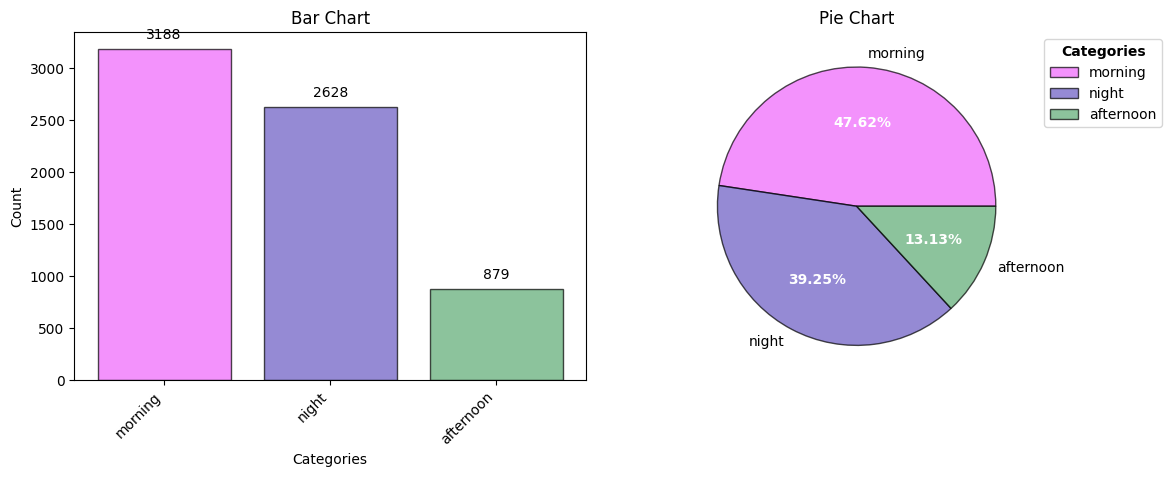

In [33]:
(
    train_data
    .assign(dep_time=lambda df_:(
        np.select([df_.dep_time.dt.hour.between(4,12, inclusive="left"),
                   df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                   df_.dep_time.dt.hour.between(12,16,inclusive="left")],
                   ["morning","afternoon","evening"],
                    default="night")
    ))
    .pipe(eda_helper_functions.cat_univar_plots,"dep_time",show_wordcloud=False)
)

In [34]:
eda_helper_functions.num_summary(train_data,"duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,922.5
90,1440.0
95,1601.5
99,1855.0


,value
mean,633.489171
trimmed mean (5%),599.711299
trimmed mean (10%),571.053761
median,510.000000


,value
var,253015.348516
std,503.006311
IQR,752.500000
mad,340.000000
coef_variance,0.794025


,value
skewness,0.893578
kurtosis,-0.053860


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 7.39934424543729e-57
Test Statistic       : 0.8865693123370929
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.46369663341648
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


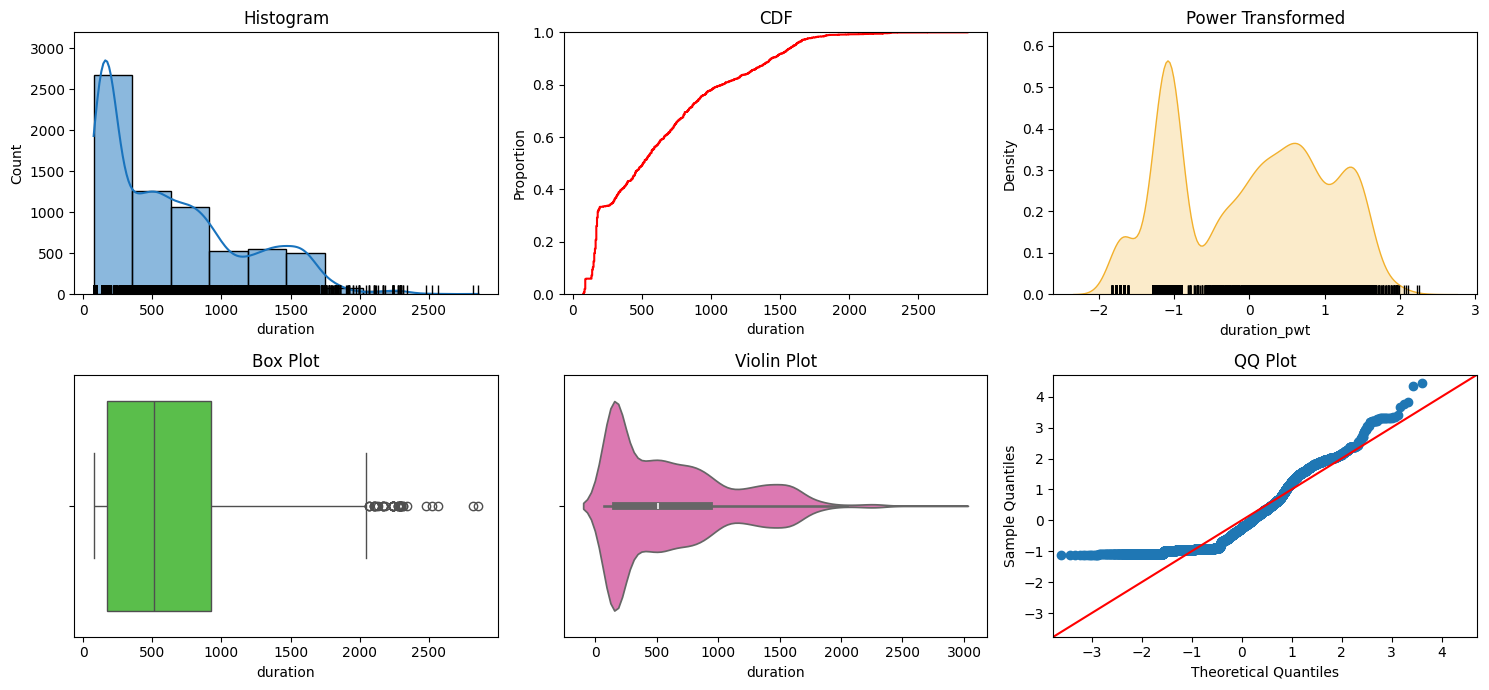

In [35]:
eda_helper_functions.num_univar_plots(train_data, "duration")

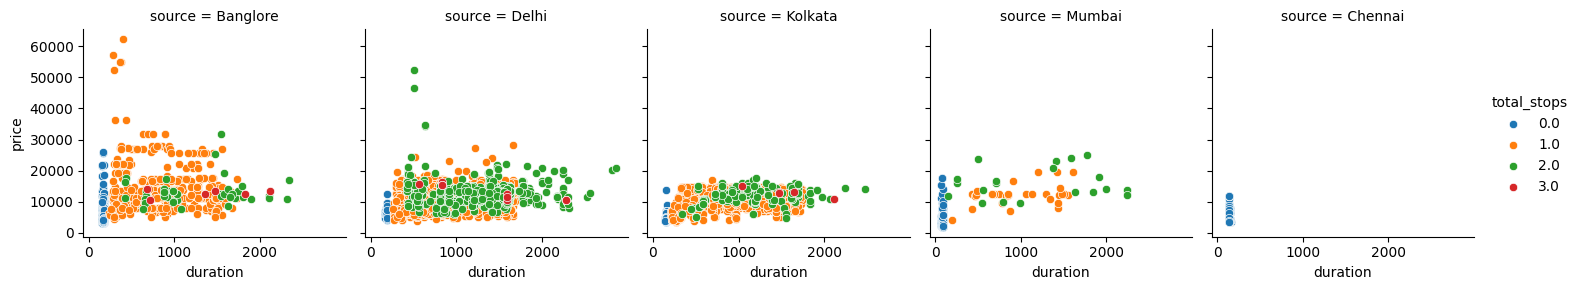

In [36]:
duration_grid=sns.FacetGrid(
    data=train_data,
    col="source",
    hue="total_stops",
    sharey=True
)
duration_grid.map(sns.scatterplot,"duration","price")
duration_grid.add_legend()

In [38]:
eda_helper_functions.get_iqr_outliers(train_data,"duration").count()

Lower Limit : -958.75
Upper Limit : 2051.25


airline            49
date_of_journey    49
source             49
destination        49
dep_time           49
arrival_time       49
duration           49
total_stops        49
additional_info    49
price              49
dtype: int64